# Chapter 2: Deep Learning with PyTorch

 This chapter covers
 
* What are PyTorch tensors and how to conduct operations on them
* Preparing data in PyTorch for deep learning
* Building and training deep neural networks with PyTorch 
* Binary and multi-category classifications with deep learning
* Creating a validation set to determine when to stop training


In this book, all the magic content, including text, images, shapes, music, and more, will be conjured into existence by the mystical power of deep neural networks. I assume you possess a prior familiarity with the inner workings of machine learning (ML), and specifically, a foundational understanding of the structural underpinnings of artificial neural networks. In this chapter, I’ll first refresh your memory on a few key concepts such as loss functions, activation functions, optimizers, and the learning rate, which constitute indispensable elements in the development and training of deep neural networks. Should there be any gaps in your knowledge pertaining to these concepts, it is strongly encouraged that you rectify them before progressing further with projects in this book.

Generative AI models are frequently confronted with the task of either binary or multi-category classification. For instance, in Generative Adversarial Networks (GANs), the discriminator undertakes the essential role of a binary classifier, its purpose being to distinguish between the fake samples created by the generator from real samples from the training set. Similarly, in the context of text generation models, whether in recurrent neural networks or Transformers, the overarching objective is to predict the subsequent character or word from an extensive array of possibilities, thereby manifesting a classification task encompassing multiple categories. Consequently, it is important that you possess the expertise required for the creation of deep neural networks adept at performing both binary and multi-category classification tasks.

While deep neural networks can be created and trained in other frameworks such as TensorFlow, you’ll be using PyTorch to build and train deep neural networks for generative modeling purposes in this book (for reasons I discussed in Chapter 1). In this chapter, you’ll learn how to use PyTorch to create deep neural networks to perform binary and multi-category classifications so that you become well-versed in deep learning and classification tasks. 

Specifically, you will engage in an end-to-end deep learning project in PyTorch, on a quest to classify gray-scale images of clothing items into different categories such as coats, bags, sneakers, shirts, and so on. The intention is to prepare you for the creation of deep neural networks, capable of performing both binary and multi-category classification tasks in PyTorch. This, in turn, will get you ready for the upcoming chapters, where you use deep neural networks in PyTorch to create various generative models.

To train generative AI models, we harness a diverse range of data formats such as raw text, audio files, image pixels, and arrays of numbers. Deep neural networks created in PyTorch cannot take these forms of data directly as inputs. Instead, we must first convert them into a format that the neural networks understand and accept. Specifically, you’ll convert various forms of raw data into PyTorch tensors before feeding them to generative AI models. Therefore, in this chapter, you’ll also learn the basics of data types, how to create various forms of PyTorch tensors, and how to use them in deep learning. 

# 1. Data Types in PyTorch 

## 1.1. Create PyTorch Tensors

In [1]:
heights = [189, 170, 189, 163, 183, 171, 185,
           168, 173, 183, 173, 173, 175, 178,
           183, 193, 178, 173, 174, 183, 183,
           180, 168, 180, 170, 178, 182, 180,
           183, 178, 182, 188, 175, 179, 183,
           193, 182, 183, 177, 185, 188, 188,
           182, 185, 191, 183]

In [2]:
import torch

heights_tensor = torch.tensor(heights,    #A
           dtype=torch.float64)    #B

In [3]:
t1=torch.IntTensor([1, 2, 3])    #A 
t2=torch.tensor([1, 2, 3],
             dtype=torch.int)    #B
print(t1)
print(t2)

tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3], dtype=torch.int32)


In [4]:
tensor1 = torch.zeros(2, 3)
print(tensor1)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [5]:
tensor2 = torch.ones(1,4,5)
print(tensor2)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])


In [6]:
nparr=np.array(range(10))
pt_tensor=torch.tensor(nparr)
print(pt_tensor)

## 1.2. Index and Slice PyTorch Tensors

In [7]:
height = heights_tensor[2]
print(height)

tensor(189., dtype=torch.float64)


In [8]:
height = heights_tensor[-2]
print(height)

tensor(191., dtype=torch.float64)


In [9]:
five_heights = heights_tensor[-5:]
print(five_heights)

tensor([188., 182., 185., 191., 183.], dtype=torch.float64)


## 1.3. PyTorch Tensor Shapes


In [10]:
print(heights_tensor.shape)

torch.Size([46])


In [11]:
heights_in_feet = heights_tensor / 30.48
print(heights_in_feet)

tensor([6.2008, 5.5774, 6.2008, 5.3478, 6.0039, 5.6102, 6.0696, 5.5118, 5.6759,
        6.0039, 5.6759, 5.6759, 5.7415, 5.8399, 6.0039, 6.3320, 5.8399, 5.6759,
        5.7087, 6.0039, 6.0039, 5.9055, 5.5118, 5.9055, 5.5774, 5.8399, 5.9711,
        5.9055, 6.0039, 5.8399, 5.9711, 6.1680, 5.7415, 5.8727, 6.0039, 6.3320,
        5.9711, 6.0039, 5.8071, 6.0696, 6.1680, 6.1680, 5.9711, 6.0696, 6.2664,
        6.0039], dtype=torch.float64)


In [12]:
heights_2_measures = torch.cat(
    [heights_tensor,heights_in_feet], dim=0)
print(heights_2_measures.shape)

torch.Size([92])


In [13]:
heights_reshaped = heights_2_measures.reshape(2, 46)
print(heights_reshaped)

tensor([[189.0000, 170.0000, 189.0000, 163.0000, 183.0000, 171.0000, 185.0000,
         168.0000, 173.0000, 183.0000, 173.0000, 173.0000, 175.0000, 178.0000,
         183.0000, 193.0000, 178.0000, 173.0000, 174.0000, 183.0000, 183.0000,
         180.0000, 168.0000, 180.0000, 170.0000, 178.0000, 182.0000, 180.0000,
         183.0000, 178.0000, 182.0000, 188.0000, 175.0000, 179.0000, 183.0000,
         193.0000, 182.0000, 183.0000, 177.0000, 185.0000, 188.0000, 188.0000,
         182.0000, 185.0000, 191.0000, 183.0000],
        [  6.2008,   5.5774,   6.2008,   5.3478,   6.0039,   5.6102,   6.0696,
           5.5118,   5.6759,   6.0039,   5.6759,   5.6759,   5.7415,   5.8399,
           6.0039,   6.3320,   5.8399,   5.6759,   5.7087,   6.0039,   6.0039,
           5.9055,   5.5118,   5.9055,   5.5774,   5.8399,   5.9711,   5.9055,
           6.0039,   5.8399,   5.9711,   6.1680,   5.7415,   5.8727,   6.0039,
           6.3320,   5.9711,   6.0039,   5.8071,   6.0696,   6.1680,   6.1680,
  

The new tensor, *heights_reshaped*, is two-dimensional now. We can print out its shape and size as follows:

In [14]:
print(heights_reshaped[1,-2])

tensor(6.2664, dtype=torch.float64)


The tensor, *heights_reshaped*, has a shape of 2 by 46: the axis 0 has two values and the axis 1 has 46 values. We can index and slice multi-dimensional tensors using the square bracket. For example, to print out the height of Trump in feet, we can do this:

In [15]:
print(heights_reshaped[1,-2])

tensor(6.2664, dtype=torch.float64)


## 1.4. Mathematical Operations on PyTorch Tensors
We can conduct mathematical operations on PyTorch tensors by using different methods such as mean(), median(), sum(), max(), and so on. For example, to find the median height of the 46 presidents in centimeters, we can do this:

In [16]:
print(torch.median(heights_reshaped[0,:]))

tensor(182., dtype=torch.float64)


In [17]:
print(torch.mean(heights_reshaped,dim=1))

tensor([180.0652,   5.9077], dtype=torch.float64)


In [18]:
values, indices = torch.max(heights_reshaped, dim=1)
print(values)
print(indices)

tensor([193.0000,   6.3320], dtype=torch.float64)
tensor([15, 15])


# 2. An End-to-End Deep Learning Project with PyTorch

## 2.1. Download and Visualize the Data
You can download the Fashion MNIST data directly from Torchvision datasets. 

In [19]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as T

torch.manual_seed(0)
transform=T.Compose([
    T.ToTensor(),
    T.Normalize([0.5],[0.5])])

In [20]:
train_set=torchvision.datasets.FashionMNIST(    #A
    root=".",    #B
    train=True,    #C
    download=True,    #D
    transform=transform)    #E
test_set=torchvision.datasets.FashionMNIST(root=".",
    train=False,download=True,transform=transform)

If you print out the first sample in the PyTorch tensor *train_set*, you'll see the following:

In [21]:
print(train_set[0])

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -

In [22]:
# got labels here https://github.com/pranay414/Fashion-MNIST-Pytorch 
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

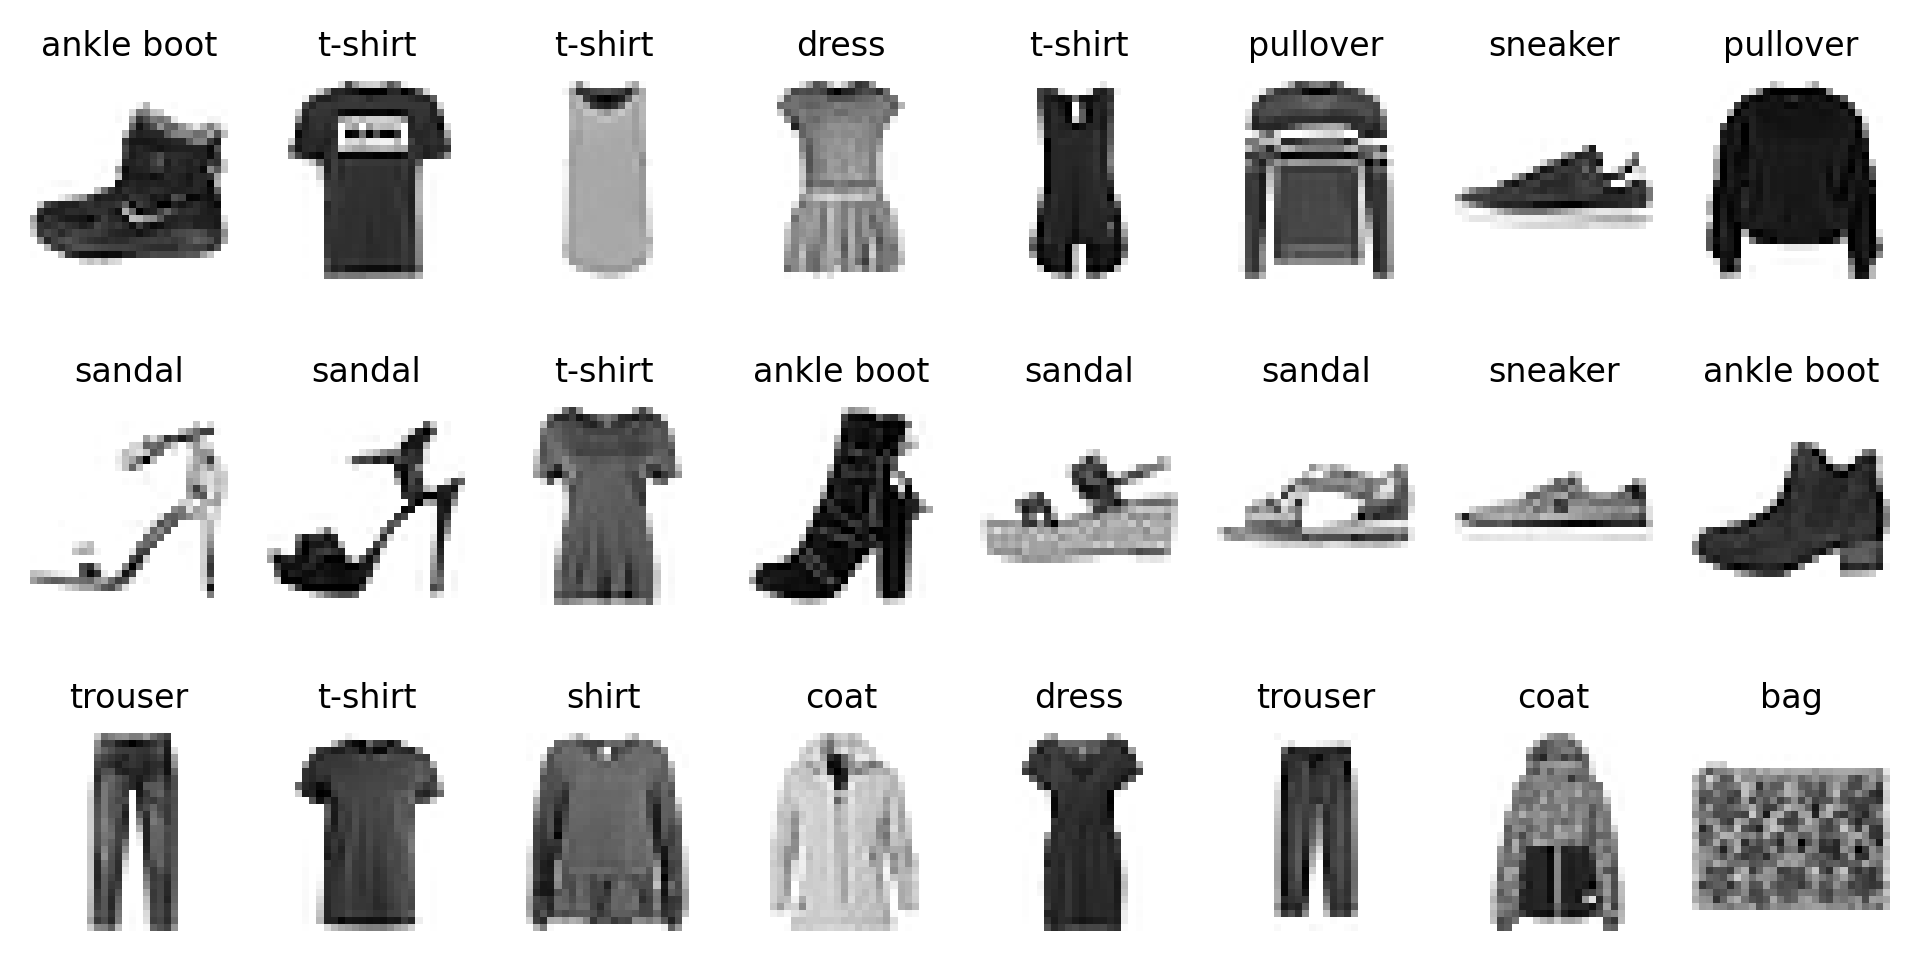

In [23]:
import matplotlib.pyplot as plt

plt.figure(dpi=300,figsize=(8,4))
for i in range(24):
    ax=plt.subplot(3, 8, i + 1)    #A
    img=train_set[i][0]    #B
    img=img/2+0.5    #C
    img=img.reshape(28, 28)    #D
    plt.imshow(img,
               cmap="binary")
    plt.axis('off')
    plt.title(text_labels[train_set[i][1]],    #E
        fontsize=8)
plt.show()

## 2.2. Create Batches 


In [24]:
binary_train_set = [x for x in train_set if x[1] in [0,9]]
binary_test_set = [x for x in test_set if x[1] in [0,9]]

We only keep samples with labels 0 or 9. Let's check the sample size as follows:

In [25]:
batch_size=64
binary_train_loader=torch.utils.data.DataLoader(
    binary_train_set,    #A
    batch_size=batch_size,    #B
    shuffle=True)    #C
binary_test_loader=torch.utils.data.DataLoader(
    binary_test_set,    #D
    batch_size=batch_size,shuffle=True)

# 3. Binary Classification
We'll first create a binary classification model. We train the model by using the images of t-shirts and ankle boots. Once it's trained, we can see if the model can tell t-shirts from ankle boots. 

## 3.1. Create A Neural Network for Binary Classification
We first use PyTorch to create the following neural network:

In [26]:
device="cuda" if torch.cuda.is_available() else "cpu"    #A

binary_model=nn.Sequential(    #B
    nn.Linear(28*28,256),    #C
    nn.ReLU(),    #D
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Linear(128,32),
    nn.ReLU(),
    nn.Linear(32,1),
    nn.Dropout(p=0.25),
    nn.Sigmoid()).to(device)    #E

In [27]:
lr=0.001
optimizer=torch.optim.Adam(binary_model.parameters(),lr=lr)
loss_fn=nn.BCELoss()

## 3.2. Train the Binary Classifier
We'll train the neural network we just created in the last subsection. We first preprocess the data so that we can feed them into the models.

In [28]:
for i in range(50):    #A
    tloss=0
    for n,(imgs,labels) in enumerate(binary_train_loader):    #B
        imgs=imgs.reshape(-1,28*28)    #C
        imgs=imgs.to(device)
        labels=torch.FloatTensor(\
          [x if x==0 else 1 for x in labels])    #D
        labels=labels.reshape(-1,1).to(device)
        preds=binary_model(imgs)    
        loss=loss_fn(preds,labels)    #E
        optimizer.zero_grad()
        loss.backward()    #F
        optimizer.step()
        tloss+=loss
    tloss=tloss/n
    print(f"at epoch {i}, loss is {tloss}")

at epoch 0, loss is 0.19446547329425812
at epoch 1, loss is 0.17356228828430176
at epoch 2, loss is 0.16996152698993683
at epoch 3, loss is 0.1738574057817459
at epoch 4, loss is 0.17647342383861542
at epoch 5, loss is 0.175820454955101
at epoch 6, loss is 0.17628391087055206
at epoch 7, loss is 0.17338122427463531
at epoch 8, loss is 0.17407435178756714
at epoch 9, loss is 0.17484807968139648
at epoch 10, loss is 0.18384821712970734
at epoch 11, loss is 0.16934403777122498
at epoch 12, loss is 0.1685514599084854
at epoch 13, loss is 0.17288489639759064
at epoch 14, loss is 0.17812766134738922
at epoch 15, loss is 0.1765325665473938
at epoch 16, loss is 0.16796113550662994
at epoch 17, loss is 0.1773425042629242
at epoch 18, loss is 0.1771104335784912
at epoch 19, loss is 0.1775158941745758
at epoch 20, loss is 0.17201370000839233
at epoch 21, loss is 0.1736348271369934
at epoch 22, loss is 0.17392438650131226
at epoch 23, loss is 0.16859592497348785
at epoch 24, loss is 0.175951361656

## 3.3. Calculate the Accuracy of the Binary Classifier

In [29]:
imgs,labels=next(iter(binary_test_loader))
imgs=imgs.reshape(-1,28*28).to(device)
labels=torch.FloatTensor([x if x==0 else 1 for x in labels])
preds=binary_model(imgs)    #A
binary_preds=torch.where(preds>0.5,1,0).detach().cpu()\
.numpy().reshape(-1,)    #B
correct=(binary_preds==labels.cpu().numpy())    #C
accuracy=correct.mean()
print(f"the accuracy of the predictions is {accuracy}")

the accuracy of the predictions is 0.890625


In [30]:
import numpy as np

results=[]
for imgs,labels in binary_test_loader:    #A
    imgs=imgs.reshape(-1,28*28).to(device)
    labels=torch.FloatTensor(\
         [x if x==0 else 1 for x in labels])
    labels=(labels).reshape(-1,1).to(device)
    preds=binary_model(imgs)
    pred10=torch.where(preds>0.5,1,0)
    correct=(pred10==labels)    #B
    results.append(correct.detach().cpu()\
      .numpy().mean())    #C
accuracy=np.array(results).mean()    #D
print(f"the accuracy of the predictions is {accuracy}")     

the accuracy of the predictions is 0.88330078125


# 4. Multi-Category Classification
We use a binary classification model when there are only two different types of models. In the example we just saw, there are only two types of clothes: t-shirts or ankle boots. 

However, the Fashion MNIST dataset contains 10 different categoires of clothes items. We therefore need to create a multi-category classification model to classify them. Next, you'll learn how to create such a model and train it. You'll also learn how to make predictions using the trained model and assess the accuracy of the predictions.

## 4.1. Validation Set and Early Stopping
We use PyTorch to create the following neural network:

In [31]:
train_set,val_set=torch.utils.data.random_split(\
    train_set,[50000,10000])
train_loader=torch.utils.data.DataLoader(
    train_set,    
    batch_size=batch_size,   
    shuffle=True)   
val_loader=torch.utils.data.DataLoader(
    val_set,    
    batch_size=batch_size,   
    shuffle=True)
test_loader=torch.utils.data.DataLoader(
    test_set,    
    batch_size=batch_size,   
    shuffle=True)

In [32]:
class EarlyStop:
    def __init__(self, patience=10):
        self.patience = patience
        self.steps = 0
        self.min_loss = float('inf')
    def stop(self, val_loss):
        if val_loss < self.min_loss:
            self.min_loss = val_loss
            self.steps = 0
        elif val_loss >= self.min_loss:
            self.steps += 1
        if self.steps >= self.patience:
            return True
        else:
            return False
stopper=EarlyStop()

## 4.2. A Multi-Category Classification Model
We use PyTorch to create the following neural network:

In [33]:
model=nn.Sequential(
    nn.Linear(28*28,256),
    nn.ReLU(),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.Dropout(p=0.20),
    nn.Softmax(dim=1)).to(device)

We'll use the same learning rate and optimizer as we did in binary classification. However, we now use the cross-entropy loss function to conduct our multi-category classifications. 

In [34]:
lr=0.001
optimizer=torch.optim.Adam(model.parameters(),lr=lr)
loss_fn=nn.CrossEntropyLoss()

## 4.3. Train the Multi-Category Classifier
We'll train the multi-category classifier we just created. 

In [35]:
def train_epoch():
    tloss=0
    for n,(imgs,labels) in enumerate(train_loader):    
        imgs=imgs.reshape(-1,28*28).to(device)
        labels=labels.reshape(-1,).to(device)
        preds=model(imgs)    
        loss=loss_fn(preds,labels)
        optimizer.zero_grad()
        loss.backward()    
        optimizer.step()
        tloss+=loss
    return tloss/n  

In [36]:
def val_epoch():
    vloss=0
    for n,(imgs,labels) in enumerate(val_loader):    
        imgs=imgs.reshape(-1,28*28).to(device)
        labels=labels.reshape(-1,).to(device)
        preds=model(imgs)    
        loss=loss_fn(preds,labels)    
        vloss+=loss
    return vloss/n 

In [37]:
for i in range(1,101):    
    tloss=train_epoch()
    vloss=val_epoch()
    print(f"at epoch {i}, tloss is {tloss}, vloss is {vloss}")
    if stopper.stop(vloss)==True:             
        break  

at epoch 1, tloss is 1.7892459630966187, vloss is 1.741585612297058
at epoch 2, tloss is 1.7282503843307495, vloss is 1.7292321920394897
at epoch 3, tloss is 1.719660997390747, vloss is 1.720980167388916
at epoch 4, tloss is 1.714342713356018, vloss is 1.7274682521820068
at epoch 5, tloss is 1.7148711681365967, vloss is 1.7121411561965942
at epoch 6, tloss is 1.710961103439331, vloss is 1.720767855644226
at epoch 7, tloss is 1.7111543416976929, vloss is 1.7062463760375977
at epoch 8, tloss is 1.7060102224349976, vloss is 1.7209783792495728
at epoch 9, tloss is 1.7094037532806396, vloss is 1.7237530946731567
at epoch 10, tloss is 1.71090829372406, vloss is 1.7233073711395264
at epoch 11, tloss is 1.7094820737838745, vloss is 1.726977825164795
at epoch 12, tloss is 1.7099305391311646, vloss is 1.7039339542388916
at epoch 13, tloss is 1.7093918323516846, vloss is 1.710881233215332
at epoch 14, tloss is 1.7025582790374756, vloss is 1.7075811624526978
at epoch 15, tloss is 1.701097965240478

Note here that we keep all ten types of clothes items, and their labels are from 0 to 9. 

## 4.4. Calculate the Accuracy of the Multi-Category Classifier

In [38]:
img,label = test_set[42]
img=img.reshape(-1,28*28).to(device)
pred=model(img)
print(f"the label is {label}")
print(f"the prediction is {pred}")

the label is 3
the prediction is tensor([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]],
         device='cuda:0',
       grad_fn=<SoftmaxBackward0>)


In [39]:
index_pred=torch.argmax(pred,dim=1)
print(index_pred)

tensor([3], device='cuda:0')


In [40]:
correct=(index_pred.detach().cpu().numpy()==label)
print(correct)

[True]


The model has made a correct prediction in this case. 

In [41]:
results=[]

for imgs,labels in test_loader:
    imgs=imgs.reshape(-1,28*28).to(device)
    labels=(labels).reshape(-1,).to(device)
    preds=model(imgs)
    pred10=torch.argmax(preds,dim=1)
    correct=(pred10==labels)
    results.append(correct.detach().cpu().numpy().mean())
    
accuracy=np.array(results).mean()

print(f"the accuracy of the predictions is {accuracy}")     

the accuracy of the predictions is 0.7376592356687898


The accuracy is about 70% in the out of sample test. Given that a random guess has an accuracy of about 10%, a 70% accuracy is fairly high. So the neural networks we have built are working well. 